## Libraries

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Set plot styles for better visualization
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

## Understanding the Dataset

### Loading the Dataset

In [50]:
data = pd.read_csv('../Data/dataset_churn.csv')

data.head()

,Unnamed: 0,CustomerID,Age,Gender,Tenure,Service_Internet,Service_Phone,Service_TV,Contract,PaymentMethod,MonthlyCharges,TotalCharges,StreamingMovies,StreamingMusic,OnlineSecurity,TechSupport,Churn
0,0,08729464-bde6-43bc-8f63-a357096feab1,56.0,Male,13,DSL,Yes,No,One year,Mailed check,71.88,931.49,No,No,Yes,No,No
1,1,af95bc95-baf4-4318-a21d-70d2ea3148b7,69.0,Male,13,DSL,No,Yes,Two year,Mailed check,110.99,1448.46,Yes,Yes,No,No,No
2,2,1fe7eee6-2227-4400-9998-4d993f4a60fd,46.0,Male,60,Fiber optic,No,Yes,Month-to-month,Mailed check,116.74,6997.73,Yes,Yes,No,No,No
3,3,f736fe7b-1b44-4acd-84c2-21c4aef648be,32.0,Female,57,Fiber optic,Yes,Yes,Month-to-month,Bank transfer,78.16,4452.13,No,Yes,No,Yes,No
4,4,4b40d12d-7633-4309-96b8-aee675ea20ae,60.0,Male,52,Fiber optic,Yes,Yes,Two year,Electronic check,30.33,1569.73,Yes,No,Yes,Yes,No


In [51]:
# removing the index column from the dataset.
data = data.drop('Unnamed: 0', axis=1)
data = data.drop('CustomerID', axis=1)

### Understanding the Dataset.

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3749 entries, 0 to 3748
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               3562 non-null   float64
 1   Gender            3749 non-null   object 
 2   Tenure            3749 non-null   int64  
 3   Service_Internet  3028 non-null   object 
 4   Service_Phone     3749 non-null   object 
 5   Service_TV        3749 non-null   object 
 6   Contract          3749 non-null   object 
 7   PaymentMethod     3562 non-null   object 
 8   MonthlyCharges    3749 non-null   float64
 9   TotalCharges      3749 non-null   float64
 10  StreamingMovies   3749 non-null   object 
 11  StreamingMusic    3749 non-null   object 
 12  OnlineSecurity    3749 non-null   object 
 13  TechSupport       3749 non-null   object 
 14  Churn             3749 non-null   object 
dtypes: float64(3), int64(1), object(11)
memory usage: 439.5+ KB


In [53]:
# Describe each feature
for column in data.columns:
    print(f"Feature: {column}")
    print(data[column].value_counts() if data[column].dtype == 'object' else data[column].describe())
    print("\n")


Feature: Age
count    3562.000000
mean       43.655531
std        14.914474
min        18.000000
25%        31.000000
50%        44.000000
75%        56.000000
max        69.000000
Name: Age, dtype: float64


Feature: Gender
Gender
Male      1895
Female    1854
Name: count, dtype: int64


Feature: Tenure
count    3749.000000
mean       36.264070
std        20.505528
min         1.000000
25%        19.000000
50%        36.000000
75%        54.000000
max        71.000000
Name: Tenure, dtype: float64


Feature: Service_Internet
Service_Internet
Fiber optic    1908
DSL            1120
Name: count, dtype: int64


Feature: Service_Phone
Service_Phone
Yes    2621
No     1128
Name: count, dtype: int64


Feature: Service_TV
Service_TV
Yes    2188
No     1561
Name: count, dtype: int64


Feature: Contract
Contract
Month-to-month    2183
Two year           792
One year           774
Name: count, dtype: int64


Feature: PaymentMethod
PaymentMethod
Electronic check    1400
Bank transfer        742
M

In [54]:
data.describe()

,Age,Tenure,MonthlyCharges,TotalCharges
count,3562.000000,3749.000000,3749.000000,3749.000000
mean,43.655531,36.264070,75.844318,2718.968266
std,14.914474,20.505528,73.062971,3211.879149
min,18.000000,1.000000,20.000000,13.190000
25%,31.000000,19.000000,44.570000,1076.240000
50%,44.000000,36.000000,69.590000,2132.260000
75%,56.000000,54.000000,95.540000,3619.710000
max,69.000000,71.000000,1179.300000,79951.800000


In [55]:
# Checking for missing values
data.isnull().sum()

Age                 187
Gender                0
Tenure                0
Service_Internet    721
Service_Phone         0
Service_TV            0
Contract              0
PaymentMethod       187
MonthlyCharges        0
TotalCharges          0
StreamingMovies       0
StreamingMusic        0
OnlineSecurity        0
TechSupport           0
Churn                 0
dtype: int64

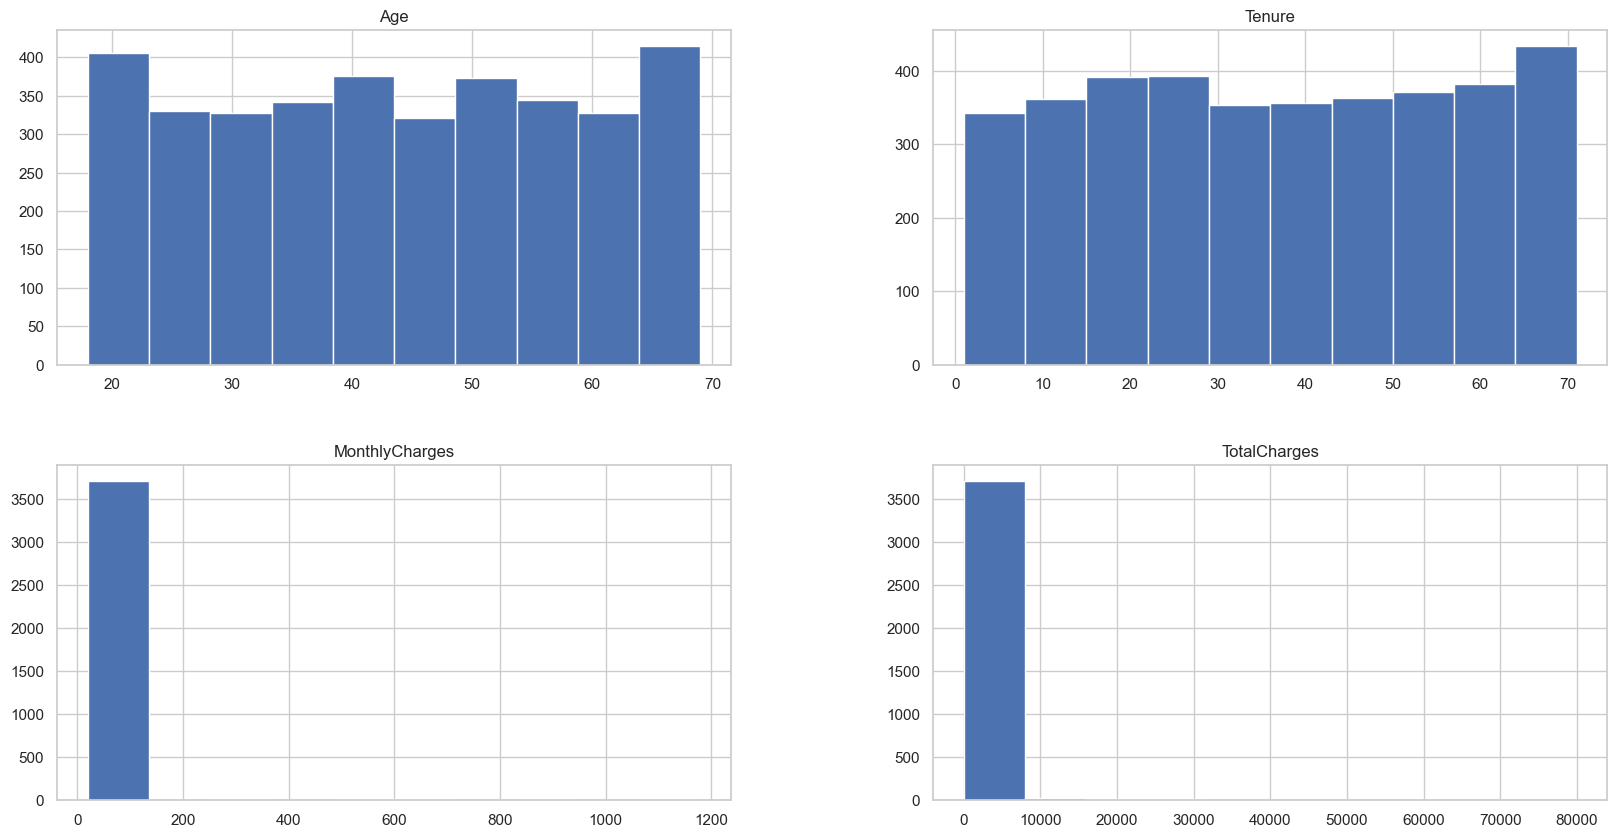

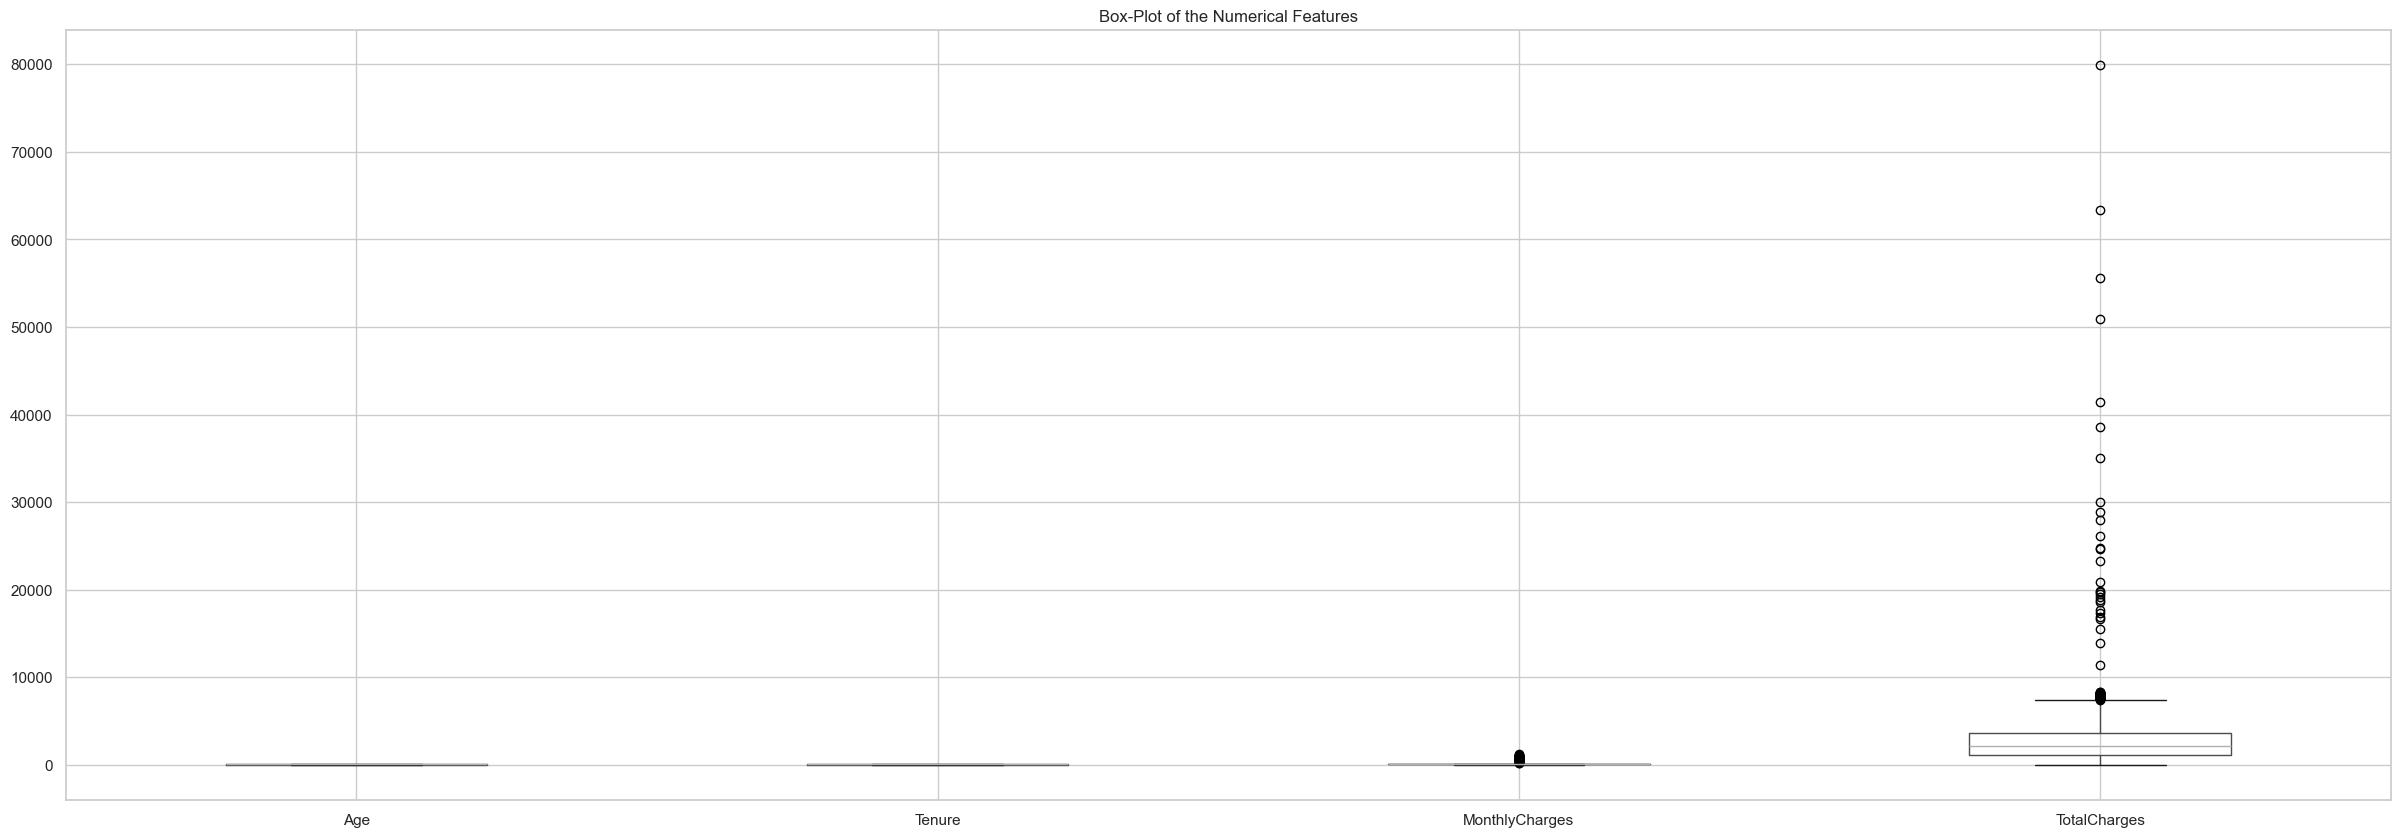

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms
data[numerical_features].hist(figsize=(20, 10))

# plot box-plot
plt.figure(figsize=(30, 10))
plt.title('Box-Plot of the Numerical Features')
data[numerical_features].boxplot(grid=True)
plt.show()


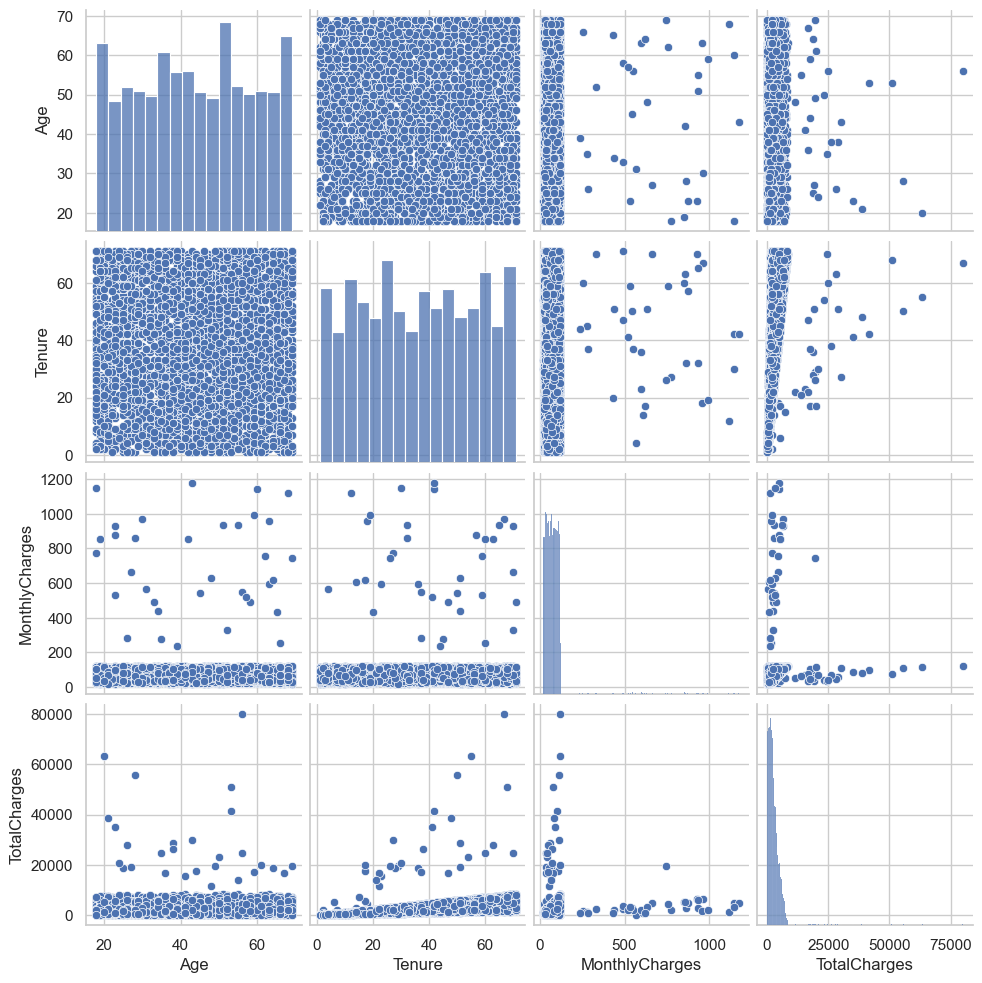

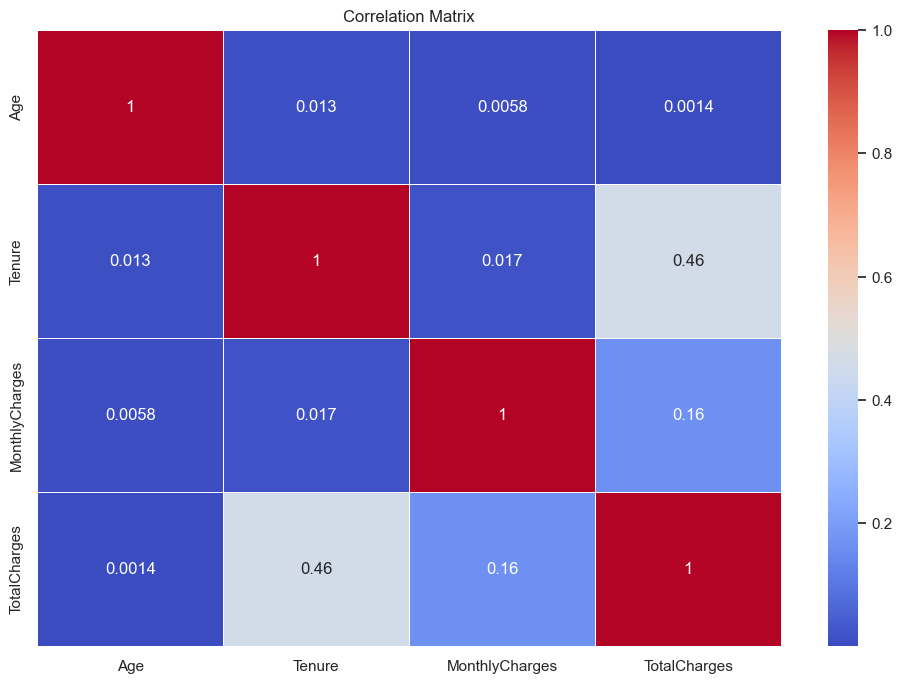

In [57]:
# Scatter plot matrix for numerical features
sns.pairplot(data[numerical_features])
plt.show()

# Correlation matrix
correlation_matrix = data[numerical_features].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
